# Problem Set 3
Submitted By: Julian Singkham  
Date: 09/27/2021

# 1) Standardization
Many machine learning algorithms are sensitive to the centering and scaling of features. Let’s walk
through what this means. To “center” data, we shift the data so that the mean is $0$. We do this
by subtracting the mean $\bar{x}$ value from every data point.
$$z=x-\bar{x}$$
To “scale” data, we want to “squish” the data so that the standard deviation is $1$. We do this by
dividing every data point by the standard deviation $\sigma$.
$$z=\frac{x}{\sigma}$$
We often combine these into a single equation:
$$z=\frac{x-\bar{x}}{\sigma}$$
A few notes on best practices: Centering and scaling is done independently for every column in the
feature matrix. When using training and testing sets, we calculate $\hat{x}$ and $\sigma$ from the training set
and use both to center and scale the training and testing sets.

(a) Load the data from the file peaks lfc.csv using Pandas. (It only contains one column.)  
(b) Plot a histogram of the data. Hint: use Seaborn’s distplot function.  
(c) Center the data. Plot the histogram. What’s different? Hint: Use Numpy’s mean function.  
(d) Scale the data. Plot the histogram. What’s different? Hint: Use Numpy’s std function.  
(e) Both center and scale the data. Plot the histogram. What’s different?  

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import sklearn as sk
from sklearn.datasets import load_iris
import seaborn as sb
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std

C:\Users\singkhamj\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,log_fold_change
0,4.28351
1,2.79465
2,1.51552
3,1.51892
4,2.05290


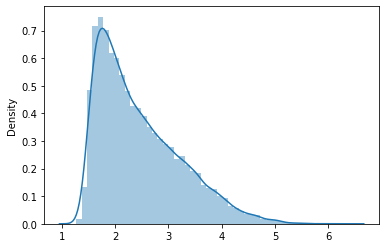

In [2]:
# Import csv to data frame
df_lfc = pd.read_csv('peak_lfc.csv')

# Plot histogram
sb.distplot(df_lfc)
df_lfc.head()

C:\Users\singkhamj\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='centered', ylabel='Density'>

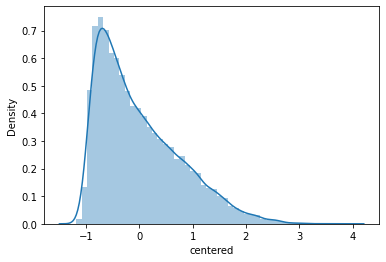

In [3]:
# Center the data.
mean = df_lfc["log_fold_change"].mean()
df_lfc["centered"] = df_lfc["log_fold_change"]-mean

# Plot histogram
sb.distplot(df_lfc["centered"])

All data points have been shifted to the left by the mean, which is approximately 2.45. After shifting the data, the new mean is near zero at 1.4792492689439704e-14.

C:\Users\singkhamj\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scaled', ylabel='Density'>

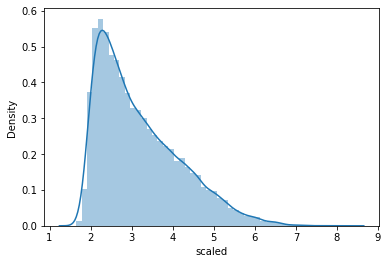

In [4]:
# Scale the data.
std = df_lfc["log_fold_change"].std()
df_lfc["scaled"] = df_lfc["log_fold_change"]/std

# Plot histogram
sb.distplot(df_lfc["scaled"])

All data points have been slightly shrunked/squished by approximately 0.77. After scaling the data, the new standard deviation is exactly 1.0.

C:\Users\singkhamj\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='combined', ylabel='Density'>

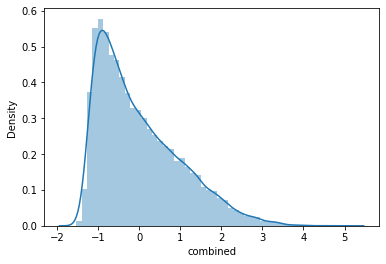

In [5]:
# Center and Scale the data.
df_lfc["combined"] = df_lfc["centered"]/std

# Plot histogram
sb.distplot(df_lfc["combined"])

All data points have been slightly shrunked/squished and shifted to the left. The histogram also appears to have gotten wider.

# 2) Observation distances
Explore how distance from the decision boundary is related to the output of our linear models.
1. Load in the IRIS dataset and put the first two features into a feature matrix. Plot these observations
2. Plot the decision boundry from lab 3 on the figure.
  1. $y=0.75x-0.9$
3. Find the projections from each observation to the line and plot a line segment for each observation
  1. We are finding the orthagonal projection of a point (observation) to the line (model)
  2. Note that we are looking for line segments that are orthagonal to the model
    1. The model is in the form of $y=m_{model}x+b$
    2. We want to solve for the orthagonal slope $m_{orthagonal}$
    3. $m_{model}m_{orthagonal}=-1\rightarrow m_{orthagonal}=-\frac{4}{3}$
    4. This gives us a "line template" of $y=-\frac{4}{3}x+b$, and now we have to solve for $b$ given our point (observation)
    5. Given the first point in the dataset - $Obs_1=(5.1, 3.5)$, we can solve $3.5=-\frac{4}{3}(5.1)+b\rightarrow b=10.3$
    6. Now we have two equations and two unknowns
        1. $y=\frac{3}{4}x-0.9$
        2. $y=-\frac{4}{3}x+10.3$
    7. We can put these in a standard form:
        1. $\frac{3}{4}x-y=0.9$
        2. $-\frac{4}{3}x-y=-10.3$
    8. In the standard form we can use linear algebra to solve for the system of equations:
        1. $\begin{bmatrix}
            \frac{3}{4} & -1 \\
            -\frac{3}{4} & -1
           \end{bmatrix}
           \begin{bmatrix}
            x \\
            y
           \end{bmatrix}
           =
           \begin{bmatrix}
            0.9 \\
            -10.3
           \end{bmatrix}$
        2. $\begin{bmatrix}
            x \\
            y
           \end{bmatrix}
           =
           \begin{bmatrix}
            \frac{3}{4} & -1 \\
            -\frac{3}{4} & -1
           \end{bmatrix}^{-1}
           \begin{bmatrix}
            0.9 \\
            -10.3
           \end{bmatrix}$
        3. Where $(x, y)$ is the projection of our point (observation) onto the line (model)
    9. you now have two points, solve for the distance between the two points
        1. $||a-b||\rightarrow 0.46$
    10. Add a vector to your figure that connects the point on the model to the observation in space, color it according to the distance.
    11. Do this for all observations in the dataset.

In [6]:
iris = load_iris()

Text(0, 0.5, 'Feature 2')

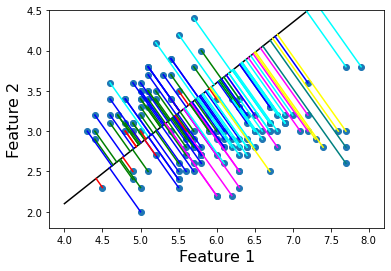

In [11]:
x = np.linspace(4, 8, 10)
plt.scatter(iris.data[:,0],iris.data[:,1])
plt.plot(x, 0.75*x-0.9, color="black", label="Decision Boundary 1")


mat_a = np.linalg.inv(np.array([[0.75,-1.0],[-4/3,-1.0]]))
output = np.zeros((iris.data[:,0].size,2))
for i in range(0,iris.data[:,0].size):
    val = 4/3*iris.data[i,0]+iris.data[i,1]
    mat_b = np.array([[0.9],[-val]])
    mul = np.matmul(mat_a, mat_b)
    output[i,:] = mul[:,0]
    if distance.euclidean((iris.data[i,0],iris.data[i,1]), (output[i,0],output[i,1])) < 0.25:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label=" 0.25 < Distance < 0.50", color="red")
    elif distance.euclidean((iris.data[i,0],iris.data[i,1]), (output[i,0],output[i,1])) < 0.50:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label="0.50 < Distance < 0.75", color="green")
    elif distance.euclidean((iris.data[i,0],iris.data[i,1]), (output[i,0],output[i,1])) < 0.75:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label="0.75 < Distance < 1.00", color="blue")
    elif distance.euclidean((iris.data[i,0],iris.data[i,1]), (output[i,0],output[i,1])) < 1.00:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label="1.00 < Distance < 1.25", color="cyan")
    elif distance.euclidean((iris.data[i,0],iris.data[i,1]), (output[i,0],output[i,1])) < 1.25:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label="1.25 < Distance < 1.50", color="magenta")
    elif distance.euclidean((iris.data[i,0],iris.data[i,1]), (output[i,0],output[i,1])) < 1.50:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label="1.50 < Distance < 1.75", color="yellow")
    else:
        plt.plot([iris.data[i,0],output[i,0]],[iris.data[i,1],output[i,1]], label="1.75 < Distance < 2.00", color="teal")
        
plt.ylim([1.8, 4.5])
plt.xlabel("Feature 1", fontsize=16)
plt.ylabel("Feature 2", fontsize=16)

# 3) Practice KNN by hand.
Note that this problem needs to be done on paper, not in a notebook.  

---

NOTE: Do this problem on paper then scan it and include it as a figure as part of this problem.

---

# 4) The bias-variance tradeoff
A model’s error can be decomposed into variance, bias and irreducible error:

- Bias refers to the error that is introduced due to wrong assumptions such as approximating a complicated pattern in data with a simple model. A high-bias model is a model that fails to capture the structure in data and results in underfitting the training data. High bias or underfitting is usually caused by a model that is too simple or when there is a few features.
- Variance refers to the amount by which the model would change if we used a different training data set. A high-variance model is a model that does not generalize well to predict new data but performs well on training data, which is also know as overfitting. High variance or overfitting is usually caused by a model that is too complex for the data.
- Irreducible error refers to the noise that exists in the data itself.

In general, there is a tradeoff between bias and variance. As the model’s complexity increases (for example going from a simple linear model to a polynomial model with a higher degree), its bias will typically decrease but its variance will increase. As the model’s complexity decreases, its variance will decrease but its bias will increase.


When a model does not perform well on the training set, we know that the model underfits the training set. When a model performs very well on the training set, but fails to show similar performance on the test set, we conclude that the model overfits the training set (hence the importance of splitting data into training and test sets).


In this exercise, you will visualize the bias-variance tradeoff of a KNN model. The complexity of a KNN model can be varied by changing k (the number of nearest neighbors).

1. How do you expect the complexity of a KNN classifier will change if $k$ increases? In other words, as we increase $k$, will the decision boundary become simpler and smoother or will it have more angles and curves?

The decision boundary becomes simpler and smoother as k increases due to the possible number of different labels decreasing. In other words, the model becomes less generalized with high k values.

2. Load diabetes.csv and extract the feature matrix $X$ and the label vector $y$ . The data consists of diagnostic measurements for some female patients and shows whether they have diabetes or not, as indicated by the last column labeled as outcome. (The data was extracted from here).
3. Use the scikit-learn implementation of KNN (KNeighborsClassifier‘) to instantiate a KNN classifier. For now, keep the default value for the number of neighbors.
4. You will now evaluate the model using cross validation. Use the method cross validate provided by scikit-learn to evaluate KNN. This method splits the data into 5 folds and returns the training scores and testing scores for each fold. Make sure to set the argument return train score to True. Find the average of the $5$ training scores and the average of the $5$ testing scores.
5. KNeighborsClassifier uses $k=5$ (number of neighbors) by default. Repeat what you did in the previous part by varying $k$ from $1$ to $50$. For each value of $k$, find the average accuracy score and the average testing score. On a same figure, plot two lines: one showing how thetraining accuracy changes with $k$ and another line showing how the testing accuracy changes with $k$.
6. Can you spot where the model has high variance (overfitting) and where it has low variance?
7. KNN can be also used for regression. Repeat the previous steps using the scikit-learn implementation of KNN regressor (KNeighborsRegressor). For this part, load the boston dataset that is provided by scikit-learn (load boston) and use the mean squared error (mean squared error) as evaluation metric: you will need to specify the scoring argument in cross validate as scoring = make scorer(mean squared error). Vary $k$ from $1$ to $400$.

In [10]:
# Import csv to data frame
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes_label = df_diabetes["Outcome"]
df_diabetes = df_diabetes.drop(["Outcome"], axis=1)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df_diabetes, df_diabetes_label)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(neigh, df_diabetes, df_diabetes_label, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.715 (0.016)


Ran out of time due to gettting stuck working on problem 2.

# 5) The curse of dimensionality
---

Note: this problem has some pictures which were unable to be adapted to the notebook from the original PDF format.

---

This exercise was adapted from the book “Introduction to Statistical Learning” (exercise 4 in chapter 4). 

KNN tends to perform poorly as the number of features increases. This is due to a phenomenon known as the curse of dimensionality, which we will explore in this exercise.

---

1. Suppose we have a set of observations that consist of one feature; those obervations cover uniformly the interval from $0$ to $1$ (the black line shown in (a)). Suppose that we wish to predict the response for a new observation (the black dot shown in (a)); this new observation is centered in a sub-interval of length $\lambda$ observations. To make the prediction for this new data point, we want to only use the observations that lie in this sub-interval (the blue line shown in (a)). On average, what fraction of the available observations we will use to make this prediction?

$\frac{\lambda}{1}$

2. Suppose we have a set of observations that consist of two features; those obervations cover uniformly the unit square (the black square shown in (b)). Suppose that we wish to predict the response for a new observation (the black dot shown in (b)); this new observation is centered in a smaller square with $\lambda$ as the side length. To make the prediction for this new data point, we want to only use the observations that lie in this small square (the blue square shown in (b)). On average, what fraction of the available observations we will use to make this prediction?

$\frac{\lambda^2}{1}$

3. Repeat the same question for when the data has 3 features (as shown in (c)). Can you generalize your answer for any number of features $p$?

$\frac{\lambda^3}{1}$

In general the fraction of available observations will be $\frac{\lambda^}{1}$ where p is the number of features.

4. Using the general form from subpart 3 and assuming that $\lambda = 0.1$ (representing the fraction of needed observations), how does the fraction of the available observations used in prediction change with $p$? You can show a plot or explain your answer. Can you argue that a disadvantage of KNN is that when $p$ is large, there are few observations that are close to the new datapoint? Optional - you can think about the fraction of observations as $\frac{k}{N}$, where $k$ is the number of nearest neighbors and $N$ is the number of observations. How many observations ($N$ expressed in terms of $p$) do we need for $k = 10$ and $\lambda = 0.1$?

$\frac{0.1^p}{1}$

For every increase in p, the available observations decreases by 10 times. Meaning that if p=2, then the number of available observations is 0.01. At p=3 the number decreases to 0.001, 100 times smaller than the original value.

When given a large p value, knn is at a great disadvantage as there are few observations that are anywhere near the new data point as distances between points greatly increase as dimensionality increases. For example lets say you are at 0,0 and a point is at 2,2. The distance would be about 2.83. If the point were to move by 10% then the new distance would be 3.11, a difference of 0.28. If were to change this to 3-D space and have the point at 2,2,2 then the distance from 0,0,0 would be 3.46. If the point were to move by 10% then the new distance would be 3.81, a difference of 0.35. As you can see, movement in 3-D space creates a larger distance when compared to 2-D if the movement is the same.

5. Assume that you need inside the hypercube $10%$ of the available observations. (Note: a hypercube is a generalization of a cube; when $p=1$ it is a line, when $p=2$ it is a square, when $p=3$ it is a cube). What is the length of each side of the hypercube? How does the length change as $p$ increases? Again you can show a plot or explain your answer. Can you argue that when $p$ is large, what KNN assumes as a near neighbor to a data point, might not be actually similar to this data point?


At P=1, the length is at 0.1, at P=2 the length is approximately 0.316 and at P=3 the length is approximately 0.464. In order to maintain the 10% point availablity rule, the length has to increase with increasing dimensionality. Like with the above example, when p is large, what knn assumes as a near neighbor point might not actually be similiar as with increasing dimensionality the distances also increase. This may mean the nearest data point is wildly different than the KNN data point.